

# Project: Investigate The FBI Gun Data Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The data this project is about is the FBI Gun Data. It contains all the background checks that were ran by the FBI for gun purchases in all 50 states. It also contains another csv file with the census data of each state.
For this project, we will be exploring the two datasets, wrangling the data for analysis, and finally answeing three questions about the data.

- Is there correlation between some census data features and the number of guns being purchased in a state? 
- what are the top 5 states in gun purchases at any given month (e.g. June 2016)?
- what is the gun purchasing trend in a given state (e.g. Delaware) between 1999 and 2017? 

In [83]:
#importing necessary packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the datasets for analysis.



In [86]:
# Load both datasets into pandas dataframes
gun_data = pd.read_excel("gun_data.xlsx", engine='openpyxl')
census_data = pd.read_csv('U.S. Census Data.csv')

#let's take a look at the first 5 rows of the gun dataset
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [87]:
#let's take a look at the first 5 rows of the census dataset
census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%




### Data Cleaning:
In this section we'll be looking at both dataframes and prepare them for exploratory analysis. We'll be only using three columns from the gun dataset, the date, the state, and total checks, since we're only interested in the total number of gun purchases. For the census dataset, we'll select the following features to test the correlation with gun purchases:
The number of veterans, 
the percentage of highscool graduates
and the percentage of university graduates.

In [88]:
# assign the proper features to the new gun dataset
gun_data = gun_data[['month','state','totals']].copy()

In [89]:
#check for duplicates
gun_data.duplicated().sum()

0

In [90]:
# check data types 
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   month   12485 non-null  object
 1   state   12485 non-null  object
 2   totals  12485 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 292.7+ KB


In [91]:
# print the first 5 rows of the census dataset
census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [92]:
# change index before transposing
census_data.set_index('Fact',inplace=True)

In [8]:
# Transpose
census_data = census_data.transpose()

In [9]:
# drop unwanted rows
census_data.drop('Fact Note',axis=0,inplace=True)

In [10]:
# drop unwanted columns
census_data = census_data.iloc[:,0:37]

In [11]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 37 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     object
 1   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     object
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     object
 3   Population, Census, April 1, 2010                                                       50 non-null     object
 4   Persons under 5 years, percent, July 1, 2016,  (V2016)                                  50 non-null     object
 5   Persons under 5 years, percent, April 1, 2010                             

In [12]:
# drop any columns with null values
census_data.dropna(axis=1,inplace=True)
census_data.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015"
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,$345,$717,"15,001","1,848,325",2.55,85.30%,5.20%,84.30%,23.50%,11.80%
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,$554,"$1,146","1,503","250,969",2.81,80.90%,16.20%,92.10%,28.00%,8.10%
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,$380,$913,"35,578","2,412,212",2.69,81.30%,26.90%,86.00%,27.50%,8.20%
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,$327,$677,"9,474","1,138,025",2.53,83.90%,7.20%,84.80%,21.10%,12.30%
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,$500,"$1,255","102,350","12,717,801",2.96,85.20%,43.90%,81.80%,31.40%,6.80%


In [13]:
# reset index
census_data.reset_index(inplace=True)


In [14]:
#rename the state column 
census_data.rename(columns={'index':'state'},inplace=True)

In [15]:
# set state column as index
census_data.set_index('state',inplace=True)

In [16]:
# merge the two datasets
df = census_data.merge(gun_data,on='state')

In [17]:
# drop unwanted columns
df.drop(df.iloc[:,2:20],axis=1,inplace=True)

In [18]:
# drop more unwanted columns
df.drop(df.iloc[:,4:17],axis=1,inplace=True)

In [19]:
# show first 5 rows in merged dataset
df.head()

,state,"Population estimates, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015",month,totals
0,Alabama,"4,863,300",65.80%,"363,170",84.30%,23.50%,11.80%,2017-09,32019
1,Alabama,"4,863,300",65.80%,"363,170",84.30%,23.50%,11.80%,2017-08,35038
2,Alabama,"4,863,300",65.80%,"363,170",84.30%,23.50%,11.80%,2017-07,31474
3,Alabama,"4,863,300",65.80%,"363,170",84.30%,23.50%,11.80%,2017-06,35687
4,Alabama,"4,863,300",65.80%,"363,170",84.30%,23.50%,11.80%,2017-05,33331


In [20]:
# change column names to more concise names
df.columns=['state','pop','white','veterans','hs_grads','grads','disable','date','total_checks']
            

          



In [21]:
df.head()

,state,pop,white,veterans,hs_grads,grads,disable,date,total_checks
0,Alabama,"4,863,300",65.80%,"363,170",84.30%,23.50%,11.80%,2017-09,32019
1,Alabama,"4,863,300",65.80%,"363,170",84.30%,23.50%,11.80%,2017-08,35038
2,Alabama,"4,863,300",65.80%,"363,170",84.30%,23.50%,11.80%,2017-07,31474
3,Alabama,"4,863,300",65.80%,"363,170",84.30%,23.50%,11.80%,2017-06,35687
4,Alabama,"4,863,300",65.80%,"363,170",84.30%,23.50%,11.80%,2017-05,33331


In [22]:
# drop more unwanted columns
df.drop(df[['white','disable']],axis=1,inplace=True)
    
    



In [23]:
# show top 5 rows of the final dataset
df.head()

,state,pop,veterans,hs_grads,grads,date,total_checks
0,Alabama,"4,863,300","363,170",84.30%,23.50%,2017-09,32019
1,Alabama,"4,863,300","363,170",84.30%,23.50%,2017-08,35038
2,Alabama,"4,863,300","363,170",84.30%,23.50%,2017-07,31474
3,Alabama,"4,863,300","363,170",84.30%,23.50%,2017-06,35687
4,Alabama,"4,863,300","363,170",84.30%,23.50%,2017-05,33331


In [24]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 11349
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         11350 non-null  object
 1   pop           11350 non-null  object
 2   veterans      11350 non-null  object
 3   hs_grads      11350 non-null  object
 4   grads         11350 non-null  object
 5   date          11350 non-null  object
 6   total_checks  11350 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 709.4+ KB


In [25]:
# drop commas, dollar signs and percent signs from numeric data
cols = ['pop','veterans','hs_grads','grads']
df[cols] = df[cols].replace({'\$': '', ',': '','\%':''}, regex=True)
# change data type of the columns to float
df[cols] = df[cols].astype('float')
    

In [26]:
# change date column data type to datetime
df['date'] = pd.to_datetime(df['date'])

In [27]:
#check new data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 11349
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   state         11350 non-null  object        
 1   pop           11350 non-null  float64       
 2   veterans      11350 non-null  float64       
 3   hs_grads      11350 non-null  float64       
 4   grads         11350 non-null  float64       
 5   date          11350 non-null  datetime64[ns]
 6   total_checks  11350 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 709.4+ KB


<a id='eda'></a>
## Exploratory Data Analysis

Now that we've trimmed and cleaned the data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.

### Research Question 1: is there correlation between some census data features and the number of guns being purchased in a state?

In [65]:
# creat a variable with the correlation matrix
corr = df.corr()
# plot correlation matrix
corr.style.background_gradient(cmap='coolwarm')

,pop,veterans,hs_grads,grads,total_checks
pop,1.000000,0.964008,-0.044919,0.021143,0.479340
veterans,0.964008,1.000000,-0.056995,0.000280,0.496709
hs_grads,-0.044919,-0.056995,1.000000,0.947445,0.010899
grads,0.021143,0.000280,0.947445,1.000000,-0.006405
total_checks,0.479340,0.496709,0.010899,-0.006405,1.000000


### The correlation matrix plot above shows no clear positive nor negative correlation between the number of guns purchased and the chosen census data.

### Research Question 2:  what are the top 5 states in gun purchases at any given month (e.g. June 2016)?

In [93]:
# creat a function returning top 5 states for gun purchases on a given date
def top(df,year,mon) :
    # change provided month to string for regex manipulation
    month = str(mon)
    # creat a variable to hold date value
    j = 0
    # if it's a double digit month
    if len(month) == 2:
        j = (df[df['date'] == '{}-{}'.format(year,int(month))])
    # if it's a single digit month
    elif len(month) == 1:
        j = (df[df['date'] == '{}-0{}'.format(year,int(month))])
    # store the sorted dataframe in variable i
    i = pd.DataFrame(j).sort_values('total_checks',ascending=False).head(5)
    
    return i

In [94]:
# let's check the top 5 states of june 2016
df_2016 = top(df,2016,6)
df_2016

,state,pop,veterans,hs_grads,grads,date,total_checks
3647,Kentucky,4436974.0,297312.0,84.2,22.3,2016-06-01,360293
923,California,39250017.0,1777410.0,81.8,31.4,2016-06-01,173846
2739,Illinois,12801539.0,668933.0,87.9,32.3,2016-06-01,164500
1831,Florida,20612439.0,1507738.0,86.9,27.3,2016-06-01,125567
9549,Texas,27862596.0,1539655.0,81.9,27.6,2016-06-01,120263


In [95]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 3647 to 9549
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   state         5 non-null      object        
 1   pop           5 non-null      float64       
 2   veterans      5 non-null      float64       
 3   hs_grads      5 non-null      float64       
 4   grads         5 non-null      float64       
 5   date          5 non-null      datetime64[ns]
 6   total_checks  5 non-null      int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 320.0+ bytes


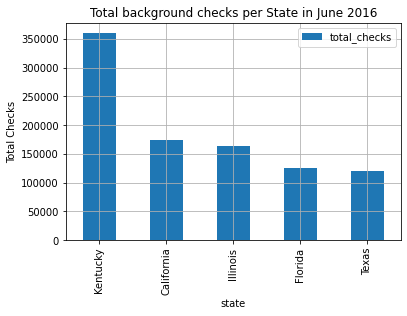

In [96]:
# let's plot the top June 2016 states dataset
df_2016.plot(x='state', y='total_checks',kind='bar')
plt.title('Total background checks per State in June 2016')
plt.xlabel('state')
plt.ylabel('Total Checks')
plt.grid(True)

### The plot shows that the top 5 states in gun purchases in june 2016 were:

     1- kentucky
      
     2- California

     3- Illinois

     4- Florida

     5- Texas

### Research Question 3:  what is the gun purchasing trend in a given state (e.g. Delaware) between 1999 and 2017? 

In [76]:
# let's creat a function to return the gun purchase data of a given state throughout the years
def time_line(state):
    x = df.loc[df.state==state]
    return x
    

In [78]:
#let's creat a dataset for Delaware
delaware_df = time_line('Delaware')

In [79]:
# show first 5 rows of the Delaware dataset
delaware_df.head()

,state,pop,veterans,hs_grads,grads,date,total_checks
1589,Delaware,952065.0,71213.0,88.4,30.0,2017-09-01,3502
1590,Delaware,952065.0,71213.0,88.4,30.0,2017-08-01,3509
1591,Delaware,952065.0,71213.0,88.4,30.0,2017-07-01,2981
1592,Delaware,952065.0,71213.0,88.4,30.0,2017-06-01,3634
1593,Delaware,952065.0,71213.0,88.4,30.0,2017-05-01,4012


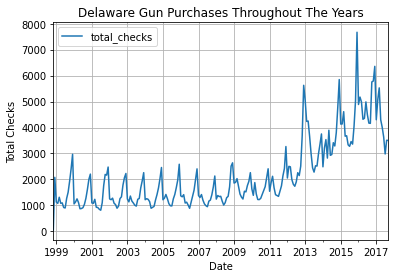

In [81]:
# Plot the Delaware dataset with a line plot showing gun purchase trends
delaware_df.plot(x='date', y='total_checks',kind='line')
plt.title('Delaware Gun Purchases Throughout The Years')
plt.xlabel('Date')
plt.ylabel('Total Checks')
plt.grid(True)

### The plot above shows the gun purchase trneds in the state of Delaware throughout the years from 1999 to 2017. The plot shows a significant surge of gun purchases in 2016.

<a id='conclusions'></a>
## Conclusions

Finally, the answers to our 3 questions are as follows: </n>

### 1- Is there correlation between some census data features and the number of guns being purchased in a state?

 - There is no clear positive nor negative correlation found between the number of gun purchases and the percentage of high school graduates, college graduates nor the number of veterans.

### 2- what are the top 5 states in gun purchases at any given month (e.g. June 2016)?

    1- Kentucky 

    2- California 

    3- Illinois  

    4- Florida 
 
    5- Texas

### 3- what is the gun purchasing trend in a given state (say, Delaware) between 1999 and 2017? 

 - We've visualised the gun purchase trneds in the state of Delaware throughout the years      from 1999 to 2017. The plot shows a significant surge of gun purchases in 2016. 






<a id='Limitations'></a>
## Limitations

For the Limitations that were encountered with the gun dataset. It was evident that gun purchases registration was not done properly. This was particularly showing in the number of null values in within a lot of columns. This suggests that there was no consistent recording of gun purchases until 2016.
